In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def calculate_points(row, w_column_name, ot_column_name):
    if row[w_column_name] == 'W':
        return 2/2
    elif row[w_column_name] == 'L' and row[ot_column_name] == 'OT':
        return 1/2
    return 0/2

In [3]:
def calculate_rolling_average(csv_file):
    df = pd.read_csv(csv_file)

    w_column_name = df.columns[df.columns.get_loc('GA') + 1]
    ot_column_name = df.columns[df.columns.get_loc(w_column_name) + 1]

    df_played = df.loc[df[w_column_name].notnull()].copy()
    df_played['P'] = df_played.apply(calculate_points, args=(w_column_name, ot_column_name), axis=1)
    df_played['10G PPct'] = df_played['P'].rolling(window=10).mean()
    return df_played

In [4]:
all_years = pd.DataFrame()
for csv in sorted(Path('.').glob('*.csv')):
    df_played = calculate_rolling_average(csv)
    df_played = df_played.set_index('GP')
    all_years[csv.name.split()[0]] = df_played['10G PPct']

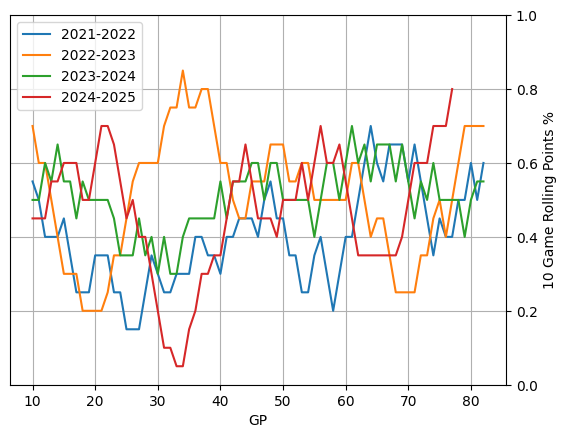

In [5]:
plot = all_years.plot(ylim=(0,1), grid=True)
plot.yaxis.set_ticks_position('right')
plot.yaxis.set_label_position('right')
plt.ylabel('10 Game Rolling Points %')
plt.legend(loc='upper left')